# Course 7 Lab 4 - Model Development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# get the dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression

In [3]:
# create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [4]:
# highway mpg is the predictor variable, price is the response variable
X = df[['highway-mpg']]
Y = df['price']

In [5]:
# fit the linear model using highway mpg
lm.fit(X,Y)

LinearRegression()

In [6]:
# output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
# what is the value of intercept 
lm.intercept_

38423.3058581574

In [8]:
# what is the value of the slope
lm.coef_

array([-821.73337832])

In [9]:
# create a linear regression called lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [10]:
# train the model using engine size as the independent variable and price as the dependent variable
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [11]:
# find the slope and the intercept of the model
print("intercept: ", lm.intercept_)
print("Slope: ", lm.coef_)

intercept:  38423.3058581574
Slope:  [-821.73337832]


In [12]:
# What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

### Multiple Linear Regression

In [13]:
# predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [14]:
# fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [15]:
# what is the value of the intercept and the coefficients
print("intercept: ", lm.intercept_)
print("Coefficients: ", lm.coef_)

intercept:  -15806.62462632923
Coefficients:  [53.49574423  4.70770099 81.53026382 36.05748882]


In [16]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
# predictor variables
Z = df[['normalized-losses', 'highway-mpg']]
# fit the linear model
lm2 = LinearRegression()
lm2.fit(Z, df['price'])

LinearRegression()

In [17]:
# Find the coefficient of the model.
print("Coefficients: ", lm2.coef_)

Coefficients:  [   1.49789586 -820.45434016]


### Model Evaluation Using Visualization

(0.0, 48167.6181247979)

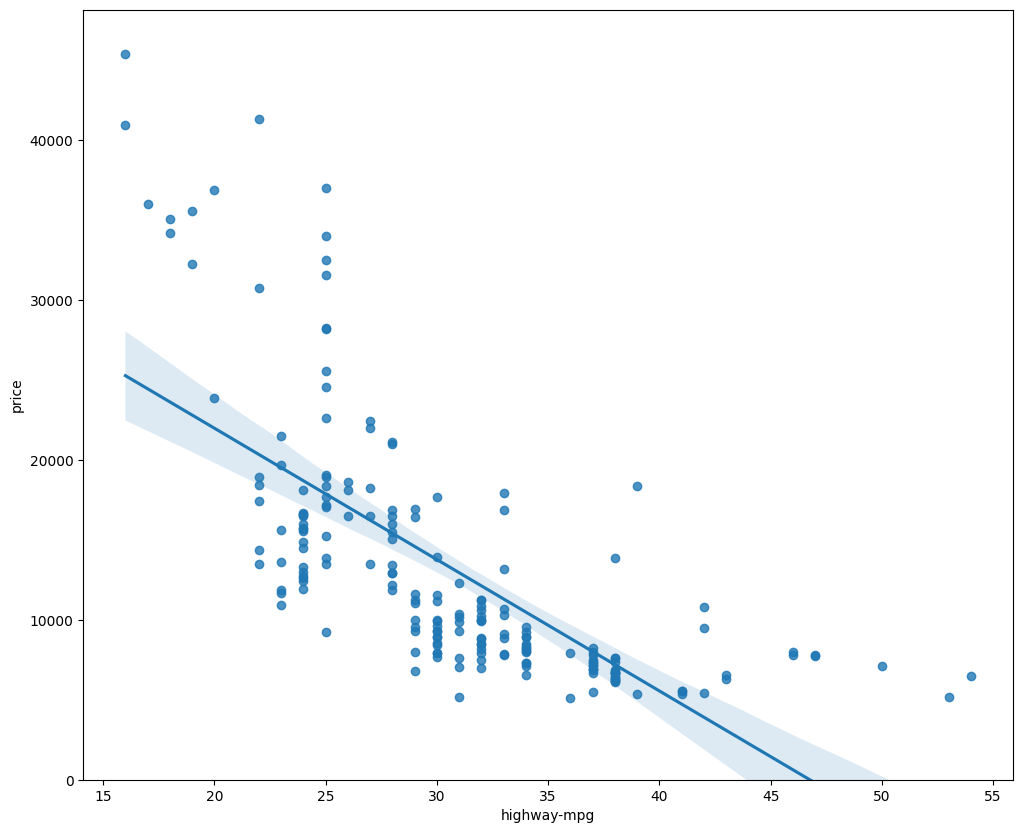

In [18]:
# visualize highway mpg as a potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

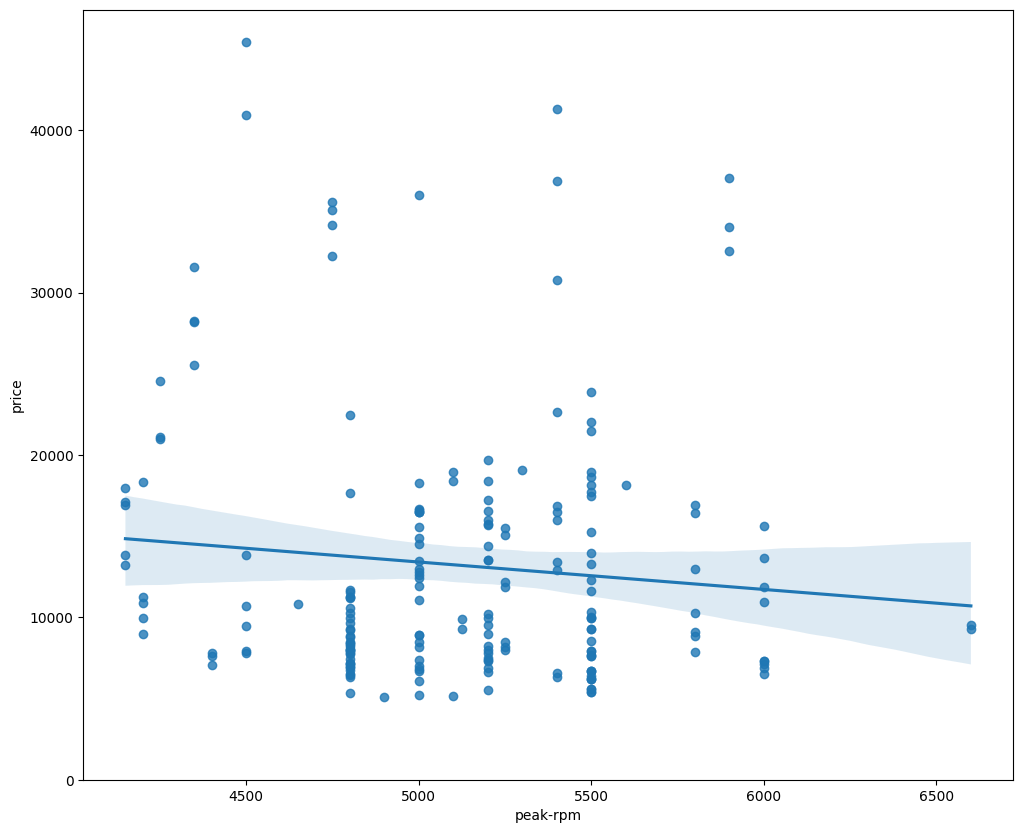

In [19]:
# compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [21]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


highway mpg has a stronger negative correlation with price than peak rpm does

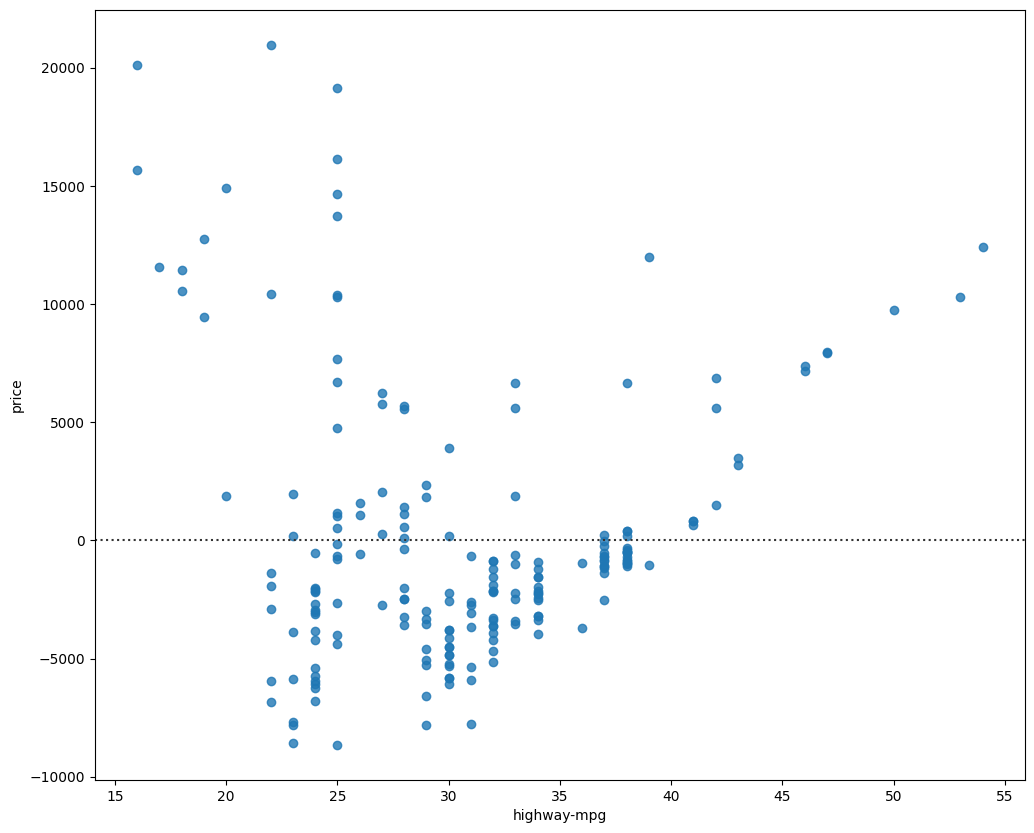

In [22]:
# plot a residual plot of highway mpg and price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data=df, x=df['highway-mpg'], y=df['price'])
plt.show()

In [23]:
# how do we visualize a model for multiple linear regression
# first we make a prediction
# predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# fit the linear model
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)

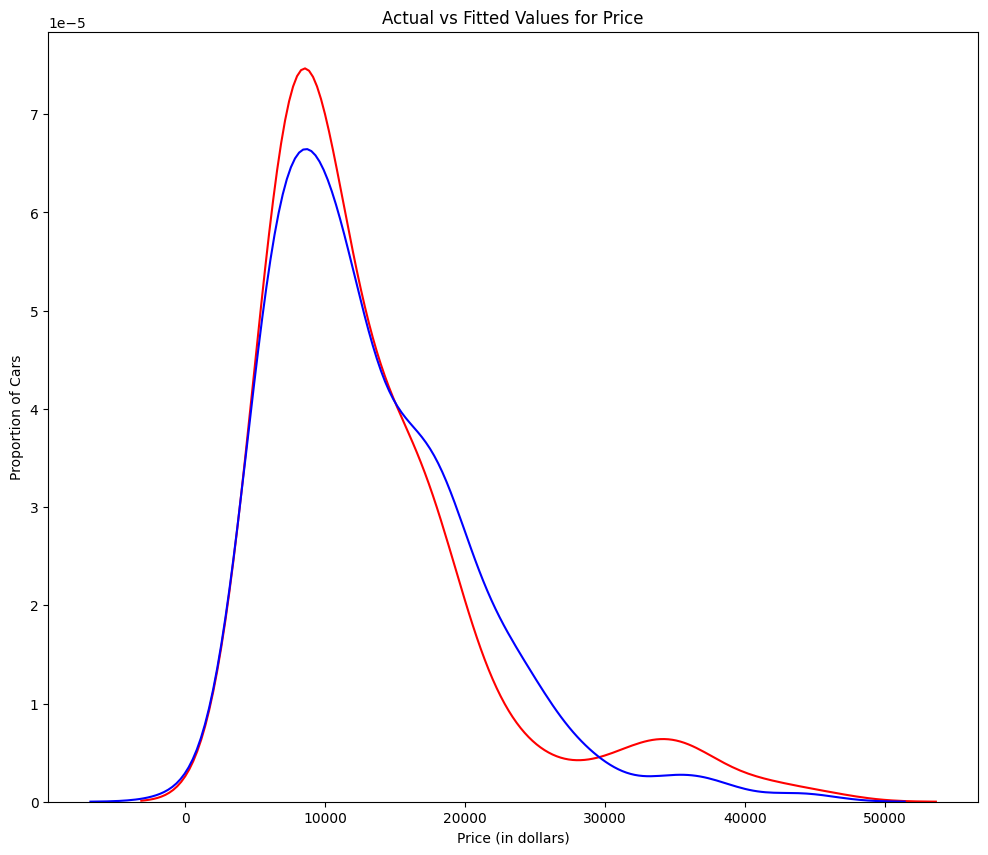

In [24]:
# make a distribution plot to visualize
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial Regrssions

In [25]:
# plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [26]:
# get the variables 
x = df['highway-mpg']
y = df['price']

In [27]:
# fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


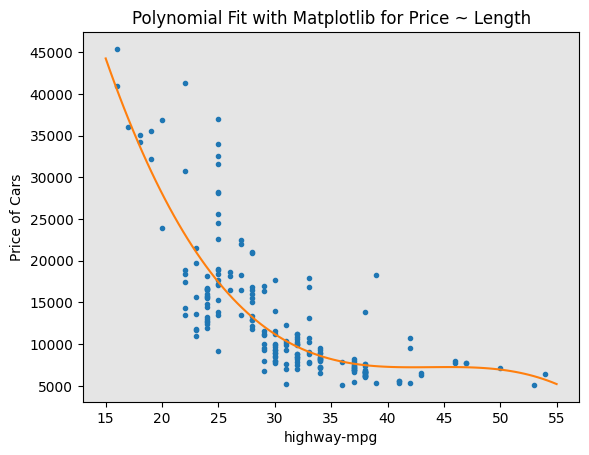

In [28]:
# plot the function
PlotPolly(p,x,y,'highway-mpg')

In [29]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [30]:
# Create 11 order polynomial model with the variables x and y from above.
# get the variables 
x = df['highway-mpg']
y = df['price']
# 11th order
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


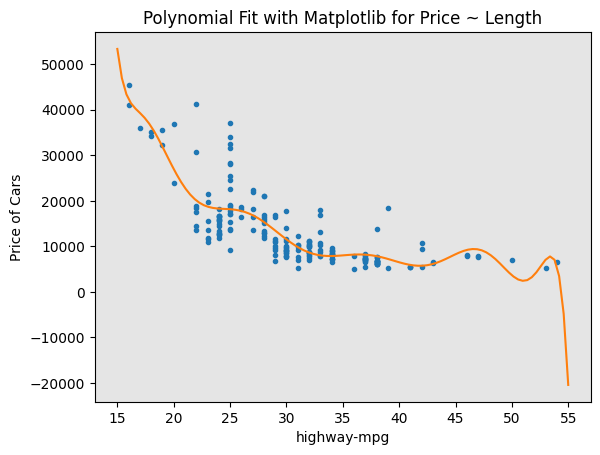

In [31]:
# plot the function
PlotPolly(p,x,y,'highway-mpg')

In [32]:
# perform a polynomial transform on multiple features.
# create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [33]:
Z_pr=pr.fit_transform(Z)

In [34]:
Z.shape

(201, 4)

In [35]:
Z_pr.shape

(201, 15)

### Pipeline

In [36]:
# create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [37]:
# input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
# convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs
Z = Z.astype(float)
# normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
# normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [40]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measures for In-Sample Evaluation

In [41]:
# calculate the R^2 of a simple linear regression
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
# We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

The R-square is:  0.4965911884339176


In [42]:
# calculate the MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639888


In [43]:
# calaculate the R^2 of a multiple linear regression
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
# We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

The R-square is:  0.8093562806577457


In [44]:
# calculate the MSE
# produce a prediction
Y_predict_multifit = lm.predict(Z)


In [45]:
# compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [46]:
# calculate the R^2 of a polynomial fit
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
# We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

The R-square value is:  0.702376909204032


In [47]:
# calculate the MSE
mean_squared_error(df['price'], p(x))

18703127.64164033

### Prediction and Decision Making

In [48]:
# create a new input
new_input = np.arange(1,100,1).reshape(-1,1)

In [49]:
# fit the model
lm.fit(X,Y)
lm

LinearRegression()

In [50]:
# produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

c:\Users\sspal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

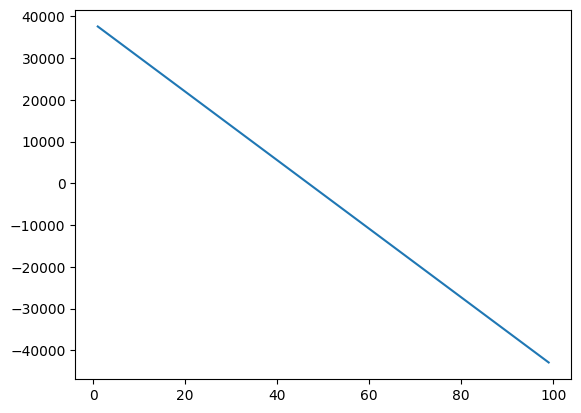

In [51]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

#### Decision Making Notes
- What is a good R-squared value?  
When comparing models, the model with the higher R-squared value is a better fit for the data.  
- What is a good MSE?  
When comparing models, the model with the smallest MSE value is a better fit for the data.